In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns; sns.set()

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
oecd = pd.read_csv('../resources/econ_happy_data_allyears.csv')
oecd.head()

,Unnamed: 0,Avg. Wages (Annual),Avg. Work Hours (Annual),Confidence in national government,Democratic Quality,Freedom to make life choices,GDP (constant 2010 US$),Healthy life expectancy at birth,Happiness Index,Log GDP per capita,Perceptions of corruption,Population density (people per sq. km of land area),"Probability of dying at age 5-14 years (per 1,000 children age 5)",Social support,"gini of household income reported in Gallup, by wp5-year"
0,0,52252,1699,0,1,0,1144260000000,72,7,10,0,2,1,0,0
1,1,50096,1557,0,1,0,391893000000,71,7,10,0,101,1,0,0
2,2,50872,1546,0,1,0,483548000000,70,6,10,0,359,1,0,0
3,3,45502,1715,0,1,0,1613460000000,72,7,10,0,3,1,0,0
4,4,24960,2070,0,0,0,218538000000,68,6,9,0,22,1,0,0


In [4]:
y = oecd["Happiness Index"]


In [5]:
X = oecd.drop(["Happiness Index"], axis=1)
feature_names = X.columns

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Jose\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=42)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.783
Accuracy score (validation): 0.685
Learning rate:  0.075
Accuracy score (training): 0.845
Accuracy score (validation): 0.741
Learning rate:  0.1
Accuracy score (training): 0.870
Accuracy score (validation): 0.759
Learning rate:  0.25
Accuracy score (training): 0.957
Accuracy score (validation): 0.870
Learning rate:  0.5
Accuracy score (training): 0.988
Accuracy score (validation): 0.907
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.870
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.833


In [9]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 1  2  0  0]
 [ 0 12  0  0]
 [ 0  2 14  0]
 [ 0  0  1 22]]
Classification Report
              precision    recall  f1-score   support

           4       1.00      0.33      0.50         3
           5       0.75      1.00      0.86        12
           6       0.93      0.88      0.90        16
           7       1.00      0.96      0.98        23

   micro avg       0.91      0.91      0.91        54
   macro avg       0.92      0.79      0.81        54
weighted avg       0.92      0.91      0.90        54



In [55]:
import pydotplus
from sklearn import tree



for i in range(gb_clf.estimators_.shape[0]):
    dot_data = tree.export_graphviz(gb_clf.estimators_[i][0], out_file=None) 
    graph = pydotplus.graph_from_dot_data(dot_data) 
    name = 'xgbtree' 
    graph.write_png(name+  '.png')

In [14]:
from sklearn.externals import joblib

joblib.dump(gb_clf, 'gb_classifier_model.pkl')


['gb_classifier_model.pkl']

In [15]:
# Load the trained model created with train_model.py
model = joblib.load('gb_classifier_model.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_names[index], (importance[index] * 100.0)))

Confidence in national government - 0.00%
Freedom to make life choices - 0.00%
Perceptions of corruption - 0.00%
Social support - 0.00%
gini of household income reported in Gallup, by wp5-year - 0.00%
Probability of dying at age 5-14 years (per 1,000 children age 5) - 1.96%
Log GDP per capita - 3.21%
Unnamed: 0 - 7.58%
Avg. Work Hours (Annual) - 10.06%
Healthy life expectancy at birth - 10.31%
Population density (people per sq. km of land area) - 13.85%
Democratic Quality - 14.80%
Avg. Wages (Annual) - 17.09%
GDP (constant 2010 US$) - 21.13%


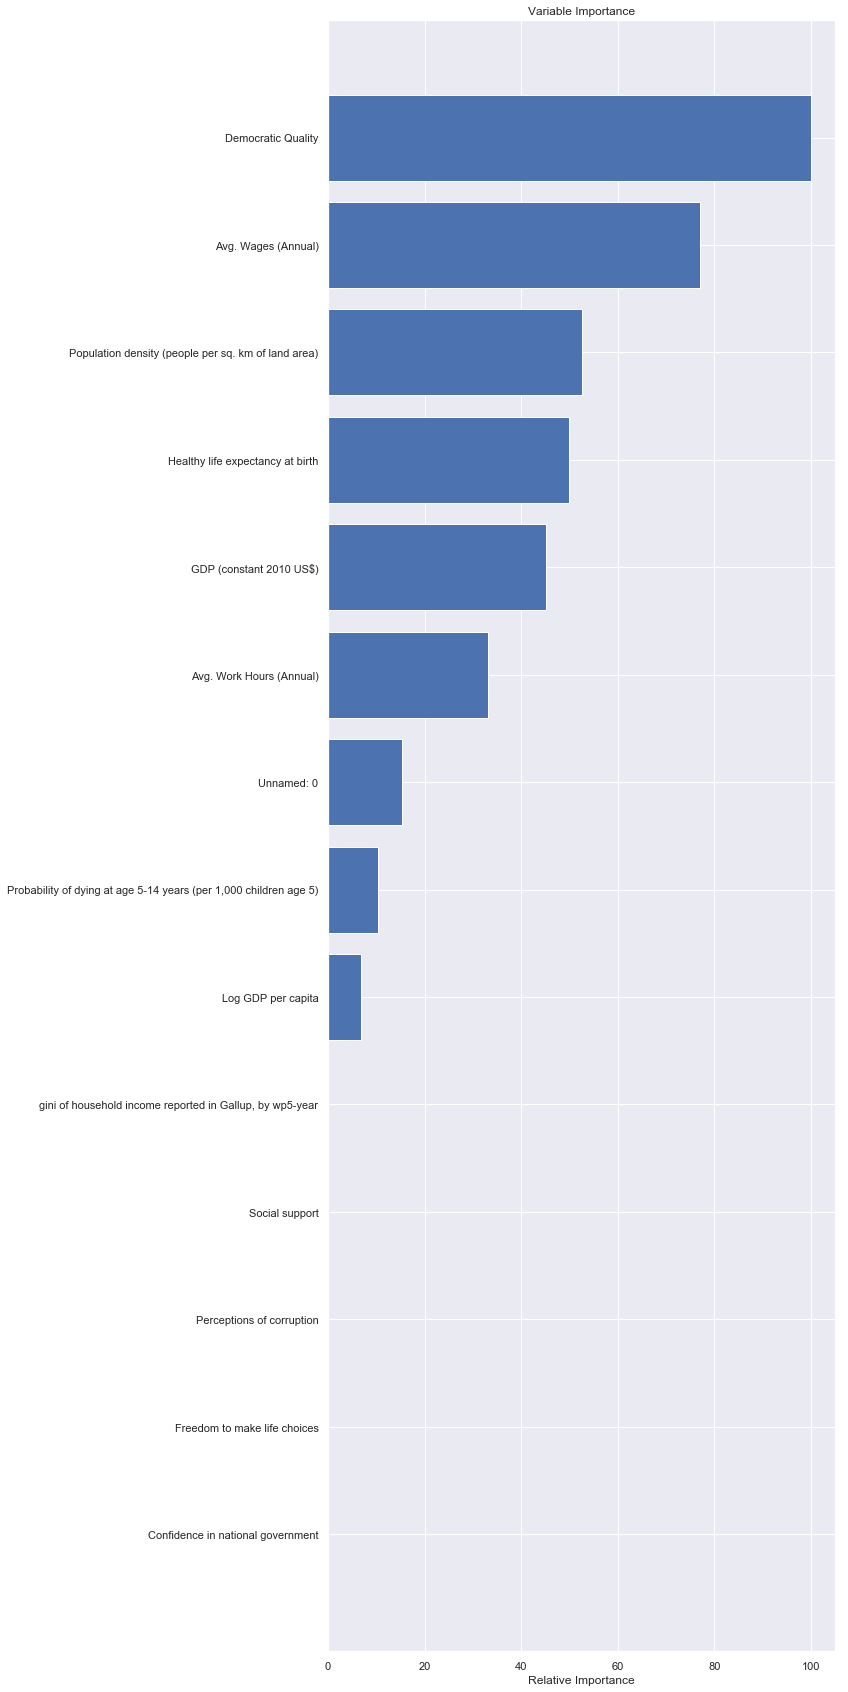

In [27]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20, 30))
plt.subplot(1, 2, 2)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('gradient_boost_classifier_features.png')
plt.show()

In [20]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import xgboost as xgb

In [21]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [22]:
score = xgb_clf.score(X_test, y_test)
print(score)

0.8518518518518519


In [23]:
joblib.dump(xgb_clf, 'xgb_classifier_model.pkl')


['xgb_classifier_model.pkl']

In [24]:
model = joblib.load('xgb_classifier_model.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_names[index], (importance[index] * 100.0)))

Confidence in national government - 0.00%
Freedom to make life choices - 0.00%
Perceptions of corruption - 0.00%
Social support - 0.00%
gini of household income reported in Gallup, by wp5-year - 0.00%
Log GDP per capita - 1.73%
Probability of dying at age 5-14 years (per 1,000 children age 5) - 2.63%
Unnamed: 0 - 3.93%
Avg. Work Hours (Annual) - 8.46%
GDP (constant 2010 US$) - 11.59%
Healthy life expectancy at birth - 12.80%
Population density (people per sq. km of land area) - 13.48%
Avg. Wages (Annual) - 19.76%
Democratic Quality - 25.62%


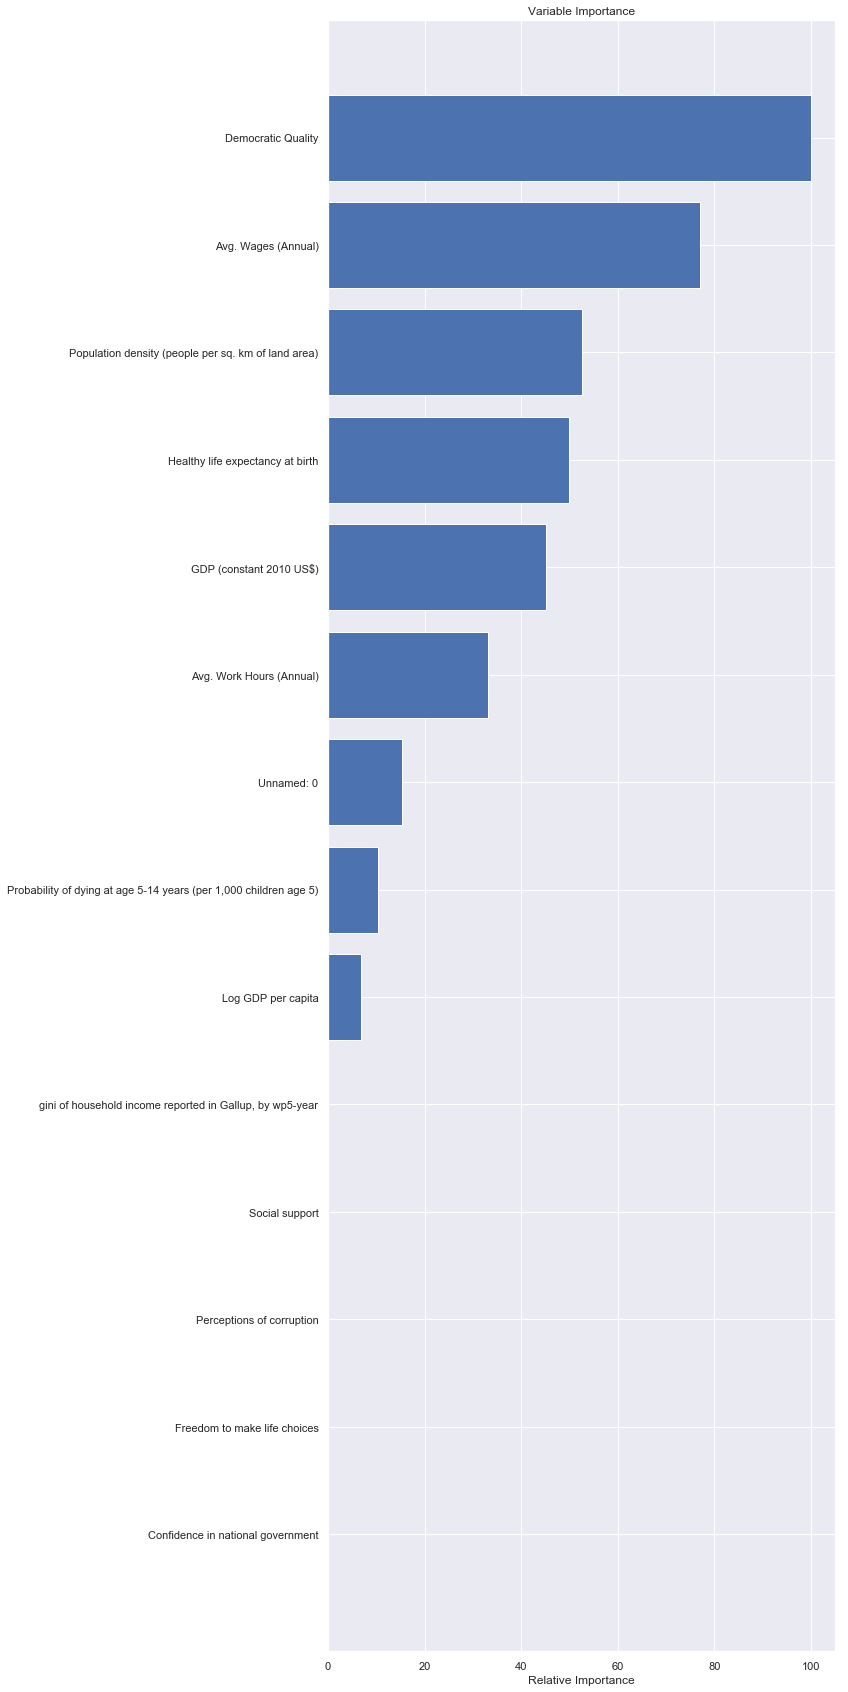

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20, 30))
plt.subplot(1, 2, 2)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
plt.savefig('xgb_classifier_feature_importance.png')
